In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
np.random.seed(26)

In [ ]:
iris=load_iris()
X= iris.data[:,2:]
y=iris.target

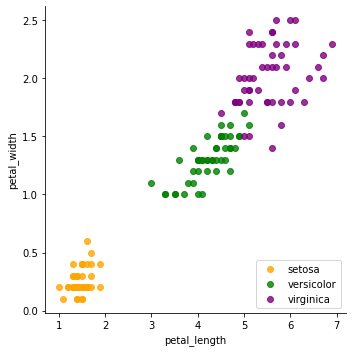

In [ ]:
#plot the data (slide 2)
Iris_data = sns.load_dataset('iris')
sns.lmplot( x="petal_length", y="petal_width", data=Iris_data, fit_reg=False, hue='species',
           legend=False, palette=dict(setosa="orange", virginica="purple", versicolor="green"))
plt.legend(loc='lower right')

Accuracy: 96.0


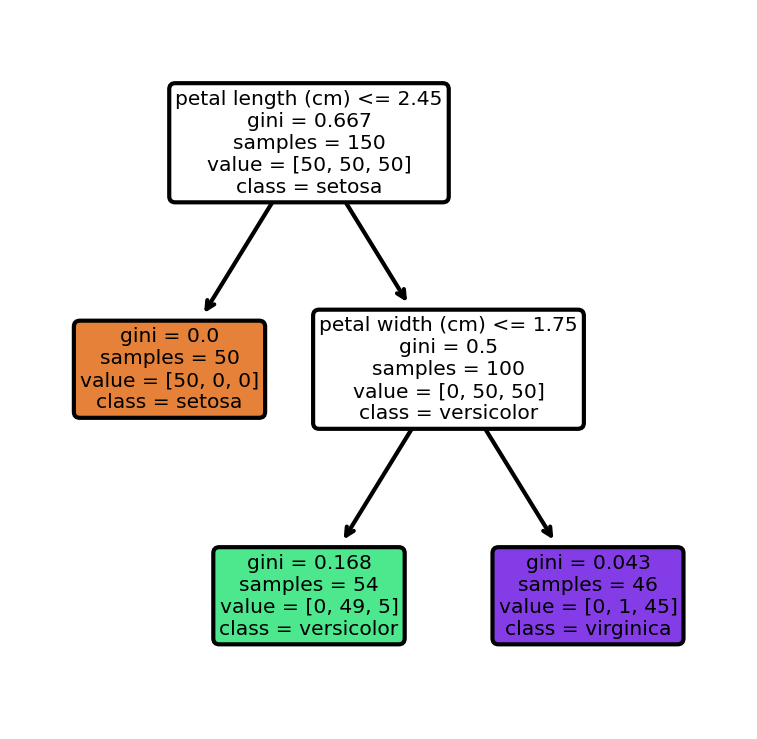

In [ ]:
# plot a decsion tree of max_depth=2 (slides# 4-5)
# the root node is selected by the alogrithm. So if you wish to view the 
#petal lenght or the petal width as the root node, you need to keep running this 
#part until you get one of them

clf_gini=DecisionTreeClassifier(max_depth=2) #change the max_depth to 3 (slide 6), change the max_depth to 5 (slide#17, right side figure)
                                             # replace max_depth with max_leaf_nodes=7 (slide#18, right side figure)
clf_gini.fit(X,y)
ypred_gini = clf_gini.predict(X)
fn=iris.feature_names[2:]
cn=iris.target_names
fig=plt.figure(figsize=(3,3),dpi=300)
tree.plot_tree(clf_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               rounded=True)
print("Accuracy:", accuracy_score(y, ypred_gini) * 100)

Accuracy: 96.0


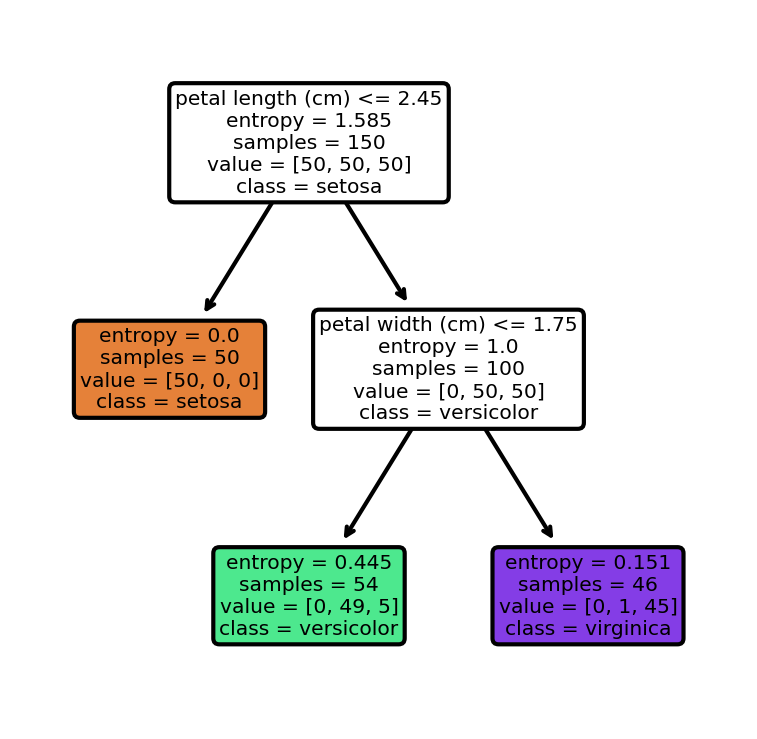

In [ ]:
clf_ent=DecisionTreeClassifier(max_depth=2, criterion='entropy') 
                                             
clf_ent.fit(X,y)
ypred_ent= clf_ent.predict(X)
fn=iris.feature_names[2:]
cn=iris.target_names
fig=plt.figure(figsize=(3,3),dpi=300)
tree.plot_tree(clf_ent,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               rounded=True)
#fig.savefig('Iris_tree.png')   #uncomment if you wish to save the figure
print("Accuracy:", accuracy_score(y, ypred_ent) * 100)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]

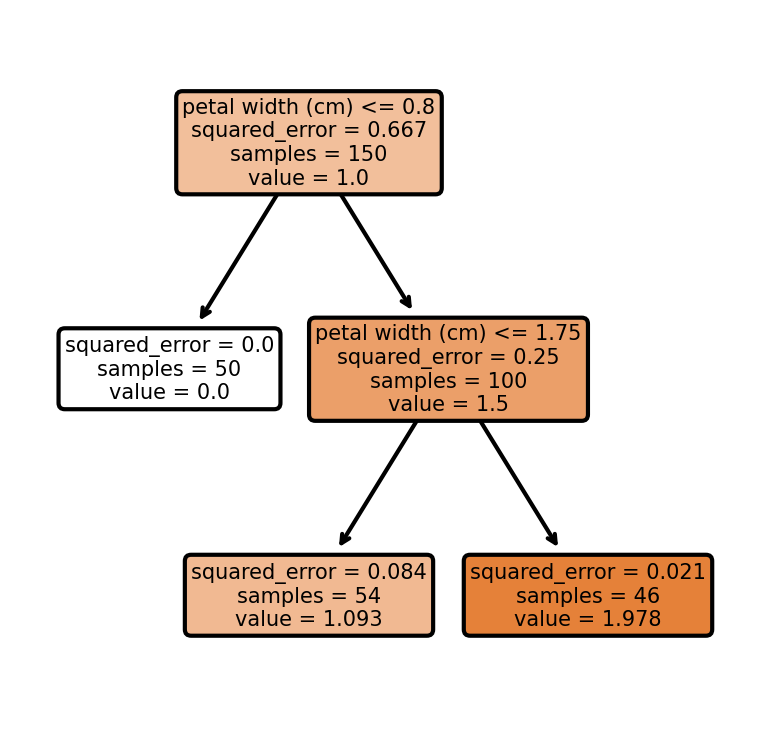

In [ ]:
# plot a decsion tree of max_depth=2 (slides# 4-5)
# the root node is selected by the alogrithm. So if you wish to view the 
#petal lenght or the petal width as the root node, you need to keep running this 
#part until you get one of them

tree_reg=DecisionTreeRegressor(max_depth=2) #change the max_depth to 3 (slide 6), change the max_depth to 5 (slide#19, right side figure)
                                             # replace max_depth with max_leaf_nodes=7 (slide#20, right side figure)
tree_reg.fit(X,y)
fn=iris.feature_names[2:]
cn=iris.target_names
fig=plt.figure(figsize=(3,3),dpi=300)
tree.plot_tree(tree_reg,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               rounded=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


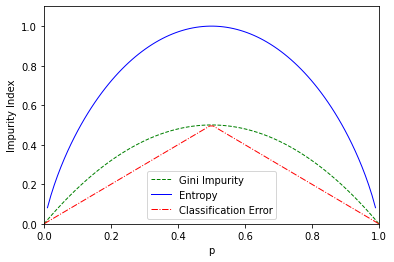

In [ ]:
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.linspace(0.0, 1.0, 100)
gini = gini(x)
ent = [entropy(p) if p != 0 else None for p in x]
err = [classification_error(p) for p in x]

for cr, lab, st, col in zip([gini, ent, err], ['Gini Impurity', 'Entropy', 'Classification Error'], ['--', '-', '-.'], ['green', 'blue', 'red']):
  plt.plot(x, cr, label=lab, linestyle=st, lw=1, color=col)

plt.legend(loc=0)
plt.ylim([0, 1.1])
plt.xlim([0, 1.0])
plt.xlabel('p')
plt.ylabel('Impurity Index')
plt.show()

In [ ]:
# print the probability with different tree depth (slides 13-15 )
tree_clf_depth2=DecisionTreeClassifier(max_depth=2).fit(X,y)
tree_clf_depth3=DecisionTreeClassifier(max_depth=3).fit(X,y)
tree_clf_depth4=DecisionTreeClassifier(max_depth=4).fit(X,y)

print(tree_clf_depth2.predict_proba([[5, 1.5]]))
print(tree_clf_depth3.predict_proba([[5, 1.5]]))
print(tree_clf_depth4.predict_proba([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[[0.         0.33333333 0.66666667]]
[[0. 0. 1.]]


In [ ]:
# plot decision boundries (slides# 17-18)

#use the moons dataset with some noise
from sklearn.datasets import make_moons
X, y= make_moons(noise=0.2, random_state=0)

n_classes = len(set(y))
plot_colors = ['orange','green','purple']
plot_step = 0.02

No handles with labels found to put in legend.


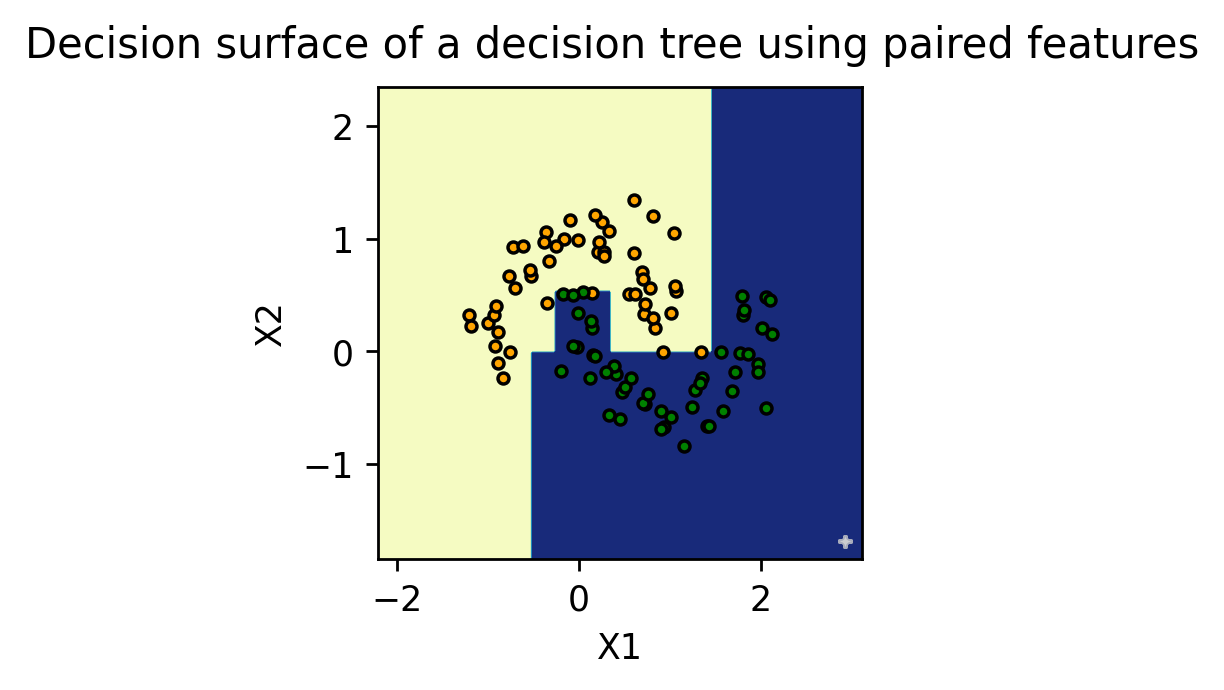

In [ ]:
Tree_moon=DecisionTreeClassifier().fit(X,y)  # add a hyperparameter max_depth=6 to obtain the figure on the right in slide# 17
                                             # add a hyperparameter max_leaf_nodes=10 to obtain the figure on the right in slide# 18
plt.figure(figsize=(2.5,2.5), dpi=250)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = Tree_moon.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.YlGnBu)

plt.xlabel('X1')
plt.ylabel('X2')

    # Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                  cmap=plt.cm.YlGnBu, edgecolor='black', s=10)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [ ]:
import sklearn
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/MCSDatasetNEXTCONLab.csv")
data.head(10)

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
5,2,45.447747,-75.147951,2,15,59,30,20,5,47,0,140784,1
6,2,45.447790,-75.148303,2,16,9,30,10,5,47,0,140784,1
7,3,45.508896,-75.259807,2,12,27,30,30,4,43,0,243994,1
8,3,45.508748,-75.260652,2,12,37,30,20,4,43,0,243994,1
9,3,45.508082,-75.260380,2,12,47,30,10,4,43,0,243994,1


In [ ]:
days = [5, 6]
data_tr = data[data.Day.isin(days)==False]
data_ts = data[data.Day.isin(days)]

In [ ]:
data_tr = data_tr.drop(columns=['ID', 'Day'])
data_ts = data_ts.drop(columns=['ID', 'Day'])

In [ ]:
X_tr = data_tr.iloc[:, 0:10].values
y_tr = data_tr.iloc[:, 10:].values
y_tr = np.reshape(y_tr, (data_tr.shape[0],))

X_ts = data_ts.iloc[:, 0:10].values
y_ts = data_ts.iloc[:, 10:].values
y_ts = np.reshape(y_ts, (data_ts.shape[0],))

print("number of features before feature selection: ", X_tr.shape[1])

number of features before feature selection:  10


In [ ]:
base_clf = DecisionTreeClassifier(max_depth=None)
base_clf.fit(X_tr, y_tr)
y_pred = base_clf.predict(X_ts)
init_acc = accuracy_score(y_ts, y_pred) * 100
print("Accuracy before feature selection: ", init_acc)

print("Depth of Tree: ", base_clf.get_depth())
print("Feature importnaces: ", base_clf.feature_importances_)

model = SelectFromModel(base_clf, threshold=None, max_features=None,prefit=True)
X_new = model.transform(X_tr)
print ("Shape of X:", X_new.shape)   

Accuracy before feature selection:  94.6987951807229
Depth of Tree:  16
Feature importnaces:  [0.16187671 0.30286013 0.07309321 0.01047424 0.03551641 0.00054906
 0.0958529  0.04214348 0.09253156 0.18510228]
Shape of X: (11994, 3)


In [ ]:
print("TSNE of Training Features")
tsne = TSNE(n_components=2, random_state=0)
X_tr_tsne = tsne.fit_transform(X_tr)

fig = px.scatter(
    X_tr_tsne, x=0, y=1,
    color=y_tr
)
fig.show()

TSNE of Training Features


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
print("TSNE of Test Features")
tsne = TSNE(n_components=2, random_state=0)
X_ts_tsne = tsne.fit_transform(X_ts)

fig = px.scatter(
    X_ts_tsne, x=0, y=1,
    color=y_ts
)
fig.show()

TSNE of Test Features


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
def selectF(model, train_X =None, train_y=None, test_X=None, test_y=None, max_features=None, threshold=None):
  """
  Given DecisionTreeClassifier model returns the best features based on feature importance

  Parameters
  ----------
  model : sklearn DecisionTreeClassifier

  train_X : training set features
  train_y : training set labels
  test_X : test set features
  test_y : test set labels

  max_features : int, default=None
  The maximum number of features to select 
  
  threshold : str or float, default=None
  The threshold value to use for feature selection. Features whose importance is greater or
  equal are kept while the others are discarded. 
  
  Returns
  -------

  """
  assert type(model) == sklearn.tree._classes.DecisionTreeClassifier, f"DecisionTree model expected, got: {type(model)}"
  est = clone(model)
  
  est.fit(train_X, train_y)

  #print("Depth of Tree: ", est.get_depth())
  print('\n')
  print("Feature importnaces: ", est.feature_importances_)

  select = SelectFromModel(est, threshold=threshold, max_features=max_features, prefit=True)
  new_train_X = select.transform(train_X)
  
  if test_X is not None:
    new_test_X = select.transform(test_X)

  print('\n')
  n_features = new_train_X.shape[1]
  print ("Shape of X:", new_train_X.shape)

  return n_features, new_train_X, new_test_X

In [ ]:
clf = DecisionTreeClassifier(max_depth=None)
acc_dict = {}

for i in range(2,11):
  est = clone(clf)
  n, new_X_tr, new_X_ts = selectF(est, X_tr, y_tr, X_ts, y_ts, max_features=i, threshold=-np.inf)
  print(f'iter: {i} --- n_features: {n}')
  est.fit(new_X_tr, y_tr)
  y_pred = est.predict(new_X_ts)
  acc_dict[n] = 100 * accuracy_score(y_ts, y_pred)  



Feature importnaces:  [0.1537081  0.30201819 0.07359838 0.00840001 0.03792019 0.00156584
 0.08627463 0.04640061 0.09253156 0.19758248]


Shape of X: (11994, 2)
iter: 2 --- n_features: 2


Feature importnaces:  [0.17565644 0.31721102 0.07028689 0.01116905 0.0374065  0.00102695
 0.09322009 0.04173547 0.09253156 0.15975603]


Shape of X: (11994, 3)
iter: 3 --- n_features: 3


Feature importnaces:  [0.19912091 0.29920481 0.0737936  0.01040307 0.03830298 0.00238944
 0.0874878  0.04738902 0.09253156 0.14937681]


Shape of X: (11994, 4)
iter: 4 --- n_features: 4


Feature importnaces:  [0.13321116 0.31055916 0.07060413 0.00925953 0.038737   0.00052873
 0.09212197 0.04038174 0.09253156 0.21206503]


Shape of X: (11994, 5)
iter: 5 --- n_features: 5


Feature importnaces:  [0.13871965 0.30439937 0.07264002 0.010742   0.03360955 0.00080326
 0.08770743 0.04699872 0.09253156 0.21184846]


Shape of X: (11994, 6)
iter: 6 --- n_features: 6


Feature importnaces:  [0.18816972 0.30812577 0.07052538 0.

In [ ]:
acc_dict

{2: 97.83132530120481,
 3: 98.47389558232932,
 4: 97.8714859437751,
 5: 97.06827309236947,
 6: 94.57831325301204,
 7: 94.37751004016064,
 8: 94.29718875502007,
 9: 94.05622489959839,
 10: 94.41767068273093}

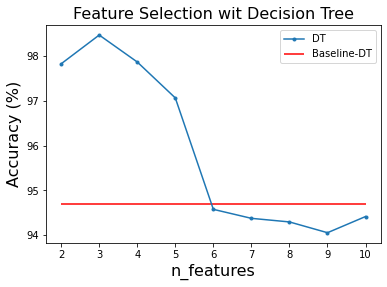

Maximum accuracy: 98.47389558232932
Best number of features: 3


In [ ]:
from matplotlib import markers
plt.close()
plt.plot(*zip(*sorted(acc_dict.items())), marker='.', label="DT")
plt.hlines(y=init_acc, xmin=2, xmax=10, color='r', linestyle='-',label="Baseline-DT")
Title = "Feature Selection wit Decision Tree"
plt.title(Title, fontsize=16)
plt.xlabel("n_features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
plt.show()
print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

In [ ]:
acc_dict

{2: 97.83132530120481,
 3: 98.47389558232932,
 4: 97.8714859437751,
 5: 97.06827309236947,
 6: 94.57831325301204,
 7: 94.37751004016064,
 8: 94.29718875502007,
 9: 94.05622489959839,
 10: 94.41767068273093}

In [ ]:
clf = DecisionTreeClassifier(max_depth=None)
n, new_X_tr, new_X_ts = selectF(clf, X_tr, y_tr, X_ts, y_ts, max_features=3, threshold=-np.inf)

final_clf = clone(clf)
final_clf.fit(new_X_tr,y_tr)
y_pred = final_clf.predict(new_X_ts)
final_acc = accuracy_score(y_ts, y_pred) * 100

print("Accuracy after feature selection: ", final_acc)
print("Depth of Tree: ", final_clf.get_depth())



Feature importnaces:  [0.18205772 0.31714951 0.07090916 0.00925411 0.04190558 0.00103712
 0.09292457 0.0393859  0.09253156 0.15284478]


Shape of X: (11994, 3)
Accuracy after feature selection:  98.51405622489959
Depth of Tree:  23


In [ ]:
tsne = TSNE(n_components=2, random_state=0)
new_X_tr_tsne = tsne.fit_transform(new_X_tr)

fig = px.scatter(
    new_X_tr_tsne, x=0, y=1,
    color=y_tr
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
tsne = TSNE(n_components=2, random_state=0)
new_X_ts_tsne = tsne.fit_transform(new_X_ts)

fig = px.scatter(
    new_X_ts_tsne, x=0, y=1,
    color=y_ts
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

